In [32]:
# !pip install netCDF4
import xarray as xr
import netCDF4
import numpy as np
import pandas as pd
import geopandas as gpd
# from google.colab import drive
from matplotlib import pyplot as plt
import datetime
import glob
from dataretrieval import nwis as nwis
import datetime
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error

In [3]:
cb_centerlines = gpd.read_file('C:/Users/dego/Documents/local_files/RSSA/Platte_centerlines_masks/vector_centerlines/s2_platte_centerlines.shp').to_crs(3857)
merit_centerlines = gpd.read_file('C:/Users/dego/Documents/local_files/RSSA/MERIT/riv_pfaf_7_MERIT_Hydro_v07_Basins_v01_bugfix1.shp').to_crs(3857)

In [4]:
Qarray = xr.open_dataset('C:/Users/dego/Documents/local_files/RSSA/grades_Q/GRADES-hydroDL_V2.0_pfaf_07_2024.nc', engine='netcdf4')

In [326]:
rwc_dfs = []

files = glob.glob('C:/Users/dego/Documents/local_files/RSSA/all_rwc_exports/*.csv')

for f in files:
    rwc_dfs.append(pd.read_csv(f))

rwc_df = pd.concat(rwc_dfs)

In [327]:
rwc_gdf = gpd.GeoDataFrame(rwc_df, geometry=gpd.points_from_xy(rwc_df.x, rwc_df.y, crs=4326))
rwc_gdf.scene_date = pd.to_datetime(rwc_gdf.scene_date, format='ISO8601').dt.date
rwc_gdf = rwc_gdf.rename(columns={'scene_date': 'date'})
rwc_gdf

,system:index,MLength,any,cloud_mask,cloudwater_mask,count,endsInWater,endsOverEdge,iindex,img_id,river_mask,scene_cloudy_pixel_percentage,date,snow_mask,width,x,y,.geo,geometry
0,20181001T174131_20181001T174133_T14TLN_0000000...,30.0,0,0.307197,0.0,2,0,0,7678,S2A_MSIL2A_20181001T174131_N0500_R098_T14TLN_2...,0.000000,10.924859,2018-10-01,0.0,0.000000,-100.971220,42.381660,"{""type"":""MultiPoint"",""coordinates"":[]}",POINT (-100.97122 42.38166)
1,20181001T174131_20181001T174133_T14TLN_0000000...,30.0,1,0.000000,0.0,2,1,0,8065,S2A_MSIL2A_20181001T174131_N0500_R098_T14TLN_2...,1.000000,10.924859,2018-10-01,0.0,30.000000,-100.927115,42.376630,"{""type"":""MultiPoint"",""coordinates"":[]}",POINT (-100.92711 42.37663)
2,20181001T174131_20181001T174133_T14TLN_0000000...,30.0,0,0.000000,0.0,2,0,0,7323,S2A_MSIL2A_20181001T174131_N0500_R098_T14TLN_2...,0.523256,10.924859,2018-10-01,0.0,15.697674,-100.984428,42.389566,"{""type"":""MultiPoint"",""coordinates"":[]}",POINT (-100.98443 42.38957)
3,20181001T174131_20181001T174133_T14TLN_0000000...,30.0,0,1.000000,0.0,2,0,0,6288,S2A_MSIL2A_20181001T174131_N0500_R098_T14TLN_2...,0.000000,10.924859,2018-10-01,0.0,0.000000,-100.893609,42.369263,"{""type"":""MultiPoint"",""coordinates"":[]}",POINT (-100.89361 42.36926)
4,20181001T174131_20181001T174133_T14TLN_0000000...,30.0,0,1.000000,0.0,2,0,0,7534,S2A_MSIL2A_20181001T174131_N0500_R098_T14TLN_2...,0.000000,10.924859,2018-10-01,0.0,0.000000,-100.974096,42.383278,"{""type"":""MultiPoint"",""coordinates"":[]}",POINT (-100.9741 42.38328)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159410,20240930T180049_20240930T180827_T13TDH_0000000...,159.0,0,0.000000,0.0,2,0,0,50066,S2B_MSIL2A_20240930T180049_N0511_R041_T13TDH_2...,0.206302,0.000000,2024-09-30,0.0,32.801978,-105.929562,42.865494,"{""type"":""MultiPoint"",""coordinates"":[]}",POINT (-105.92956 42.86549)
159411,20240930T180049_20240930T180827_T13TDH_0000000...,159.0,0,0.000000,0.0,2,0,0,50972,S2B_MSIL2A_20240930T180049_N0511_R041_T13TDH_2...,0.294618,0.000000,2024-09-30,0.0,46.844296,-106.091258,42.863787,"{""type"":""MultiPoint"",""coordinates"":[]}",POINT (-106.09126 42.86379)
159412,20240930T180049_20240930T180827_T13TDH_0000000...,159.0,0,0.000000,0.0,2,0,0,51116,S2B_MSIL2A_20240930T180049_N0511_R041_T13TDH_2...,0.176633,0.000000,2024-09-30,0.0,28.084637,-106.110392,42.860193,"{""type"":""MultiPoint"",""coordinates"":[]}",POINT (-106.11039 42.86019)
159413,20240930T180049_20240930T180827_T13TDH_0000000...,159.0,0,0.000000,0.0,2,0,0,51141,S2B_MSIL2A_20240930T180049_N0511_R041_T13TDH_2...,0.264259,0.000000,2024-09-30,0.0,42.017249,-106.136085,42.860014,"{""type"":""MultiPoint"",""coordinates"":[]}",POINT (-106.13609 42.86001)


In [328]:
gage_list = ['06764880', '06775900', '06775500', '06770200', '06767970', '06768000',
             '06784000', '06781900', '06785000', '06790500', '06800500', '06793000',
             '06800000', '06777495', '06786000', '06799350', '06799315', '06799000',
             '06797500', '06785500', '06710247', '06711565', '06714215', '06721000',
             '06759500', '06620000', '06680500', '06630000', '06674500', '06635000',
             '06670500', '06657000', '06652000']




In [329]:
gages = nwis.get_info(sites=gage_list)[0][['site_no', 'geometry']]
gages

,site_no,geometry
0,06620000,POINT (-106.33919 40.93664)
1,06630000,POINT (-107.0576 41.87217)
2,06635000,POINT (-106.51314 42.00967)
3,06652000,POINT (-105.15921 42.65248)
4,06657000,POINT (-104.62802 42.24101)
5,06670500,POINT (-104.53835 42.20051)
6,06674500,POINT (-104.05334 41.98857)
7,06680500,POINT (-103.67556 41.84994)
8,06710247,POINT (-105.01498 39.63249)
9,06711565,POINT (-105.00415 39.66499)


In [330]:
gage_buffers = gages.to_crs(3857)
# gages = gages.rename({'geometry': 'point'})
buffgeoms = gage_buffers.apply(lambda x: x['geometry'].buffer(1500), axis=1)
gage_buffers = gage_buffers.set_geometry(buffgeoms, crs=3857)
gage_buffers = gage_buffers.to_crs(4326)

In [331]:
rwc_points = rwc_gdf.geometry.unique()
n_geoms = len(rwc_points)
gindex = range(n_geoms)
geom_gindex = gpd.GeoDataFrame({'geometry': rwc_points, 'gindex': gindex})

In [332]:
geom_COMID = gpd.GeoDataFrame(geometry=rwc_points, crs=4326).to_crs(3857).sjoin_nearest(merit_centerlines, max_distance=1000).to_crs(4326)
print(len(geom_COMID))

19226


In [333]:
rwc_gdf = pd.merge(rwc_gdf, geom_gindex, how='left', on='geometry')
rwc_gdf = pd.merge(rwc_gdf, geom_COMID, how='left', on='geometry')

In [334]:
# geom_gindex = geom_gindex.to_crs(3857)
gage_rwc_points = geom_gindex.sjoin(gage_buffers, predicate='within').to_crs(4326)
gage_rwc_points

,geometry,gindex,index_right,site_no
170,POINT (-101.57759 41.12483),170,13,06764880
178,POINT (-101.56977 41.12483),178,13,06764880
190,POINT (-101.56689 41.12501),190,13,06764880
226,POINT (-101.57157 41.12546),226,13,06764880
230,POINT (-101.56402 41.12573),230,13,06764880
...,...,...,...,...
19366,POINT (-105.15576 42.649),19366,3,06652000
19387,POINT (-105.15764 42.65143),19387,3,06652000
19417,POINT (-105.15503 42.64837),19417,3,06652000
19489,POINT (-105.15369 42.6481),19489,3,06652000


In [335]:
print(len(rwc_gdf.loc[rwc_gdf.uparea >= 0]))
print(len(rwc_gdf))

2596917
7982702


In [336]:
gage_rwc = pd.merge(gage_rwc_points[['gindex', 'site_no']], rwc_gdf, how='left', on='gindex')

In [337]:
gage_COMID = gpd.sjoin_nearest(gages.to_crs(3857), merit_centerlines, max_distance=1000)[['site_no', 'COMID']]
gage_COMID_rwc = pd.merge(gage_COMID, rwc_gdf, how='left', on='COMID')

In [338]:
gage_rwc_filt = gage_rwc.loc[(gage_rwc.cloud_mask - gage_rwc.cloudwater_mask == 0) & 
                             (gage_rwc.snow_mask == 0) & 
                             (gage_rwc.endsInWater == 0) & 
                             (gage_rwc.endsOverEdge == 0) & 
                             (gage_rwc.width >= 0)]

gage_COMID_rwc_filt = gage_COMID_rwc.loc[(gage_COMID_rwc.cloud_mask - gage_COMID_rwc.cloudwater_mask == 0) & 
                                         (gage_COMID_rwc.snow_mask == 0) & 
                                         (gage_COMID_rwc.endsInWater == 0) & 
                                         (gage_COMID_rwc.endsOverEdge == 0) & 
                                         (gage_COMID_rwc.width > 0)]

In [339]:
gage_rwc_stats = gage_rwc_filt.groupby(['site_no', 'date']).agg(
    overall_mean_width = ('width', lambda x: x.mean()),
    median_width = ('width', lambda x: x.median()),
    sd_width = ('width', lambda x: x.std()),
    w05 = ('width', lambda x: x.quantile(0.05)),
    w10 = ('width', lambda x: x.quantile(0.10)),
    w20 = ('width', lambda x: x.quantile(0.20)),
    w30 = ('width', lambda x: x.quantile(0.30)),
    w40 = ('width', lambda x: x.quantile(0.40)),
    w50 = ('width', lambda x: x.quantile(0.50)),
    w60 = ('width', lambda x: x.quantile(0.60)),
    w70 = ('width', lambda x: x.quantile(0.70)),
    w80 = ('width', lambda x: x.quantile(0.80)),
    w90 = ('width', lambda x: x.quantile(0.90)),
    w95 = ('width', lambda x: x.quantile(0.95)),
    n_meas = ('width', lambda x: len(x))
)

In [340]:
gage_COMID_rwc_stats = gage_COMID_rwc_filt.groupby(['site_no', 'date']).agg(
    overall_mean_width = ('width', lambda x: x.mean()),
    median_width = ('width', lambda x: x.median()),
    sd_width = ('width', lambda x: x.std()),
    w05 = ('width', lambda x: x.quantile(0.05)),
    w10 = ('width', lambda x: x.quantile(0.10)),
    w20 = ('width', lambda x: x.quantile(0.20)),
    w30 = ('width', lambda x: x.quantile(0.30)),
    w40 = ('width', lambda x: x.quantile(0.40)),
    w50 = ('width', lambda x: x.quantile(0.50)),
    w60 = ('width', lambda x: x.quantile(0.60)),
    w70 = ('width', lambda x: x.quantile(0.70)),
    w80 = ('width', lambda x: x.quantile(0.80)),
    w90 = ('width', lambda x: x.quantile(0.90)),
    w95 = ('width', lambda x: x.quantile(0.95)),
    max_width = ('width', lambda x: x.max()),
    min_width = ('width', lambda x: x.min()),
    n_meas = ('width', lambda x: len(x)),
    # middle_mean = ('width', lambda x: mean_0595(x, 0.2, 0.99))
)

In [341]:
# gage_COMID_rwc_filt['month'] = gage_COMID_rwc_filt.apply(lambda x: x.date.month, axis=1)
# gage_COMID_rwc_filt.columns
gage_COMID_month_stats = gage_COMID_rwc_filt.groupby(['site_no', 'month']).agg(
    overall_mean_width = ('width', lambda x: x.mean()),
    median_width = ('width', lambda x: x.median()),
    sd_width = ('width', lambda x: x.std()),
    w05 = ('width', lambda x: x.quantile(0.05)),
    w10 = ('width', lambda x: x.quantile(0.10)),
    w90 = ('width', lambda x: x.quantile(0.90)),
    w95 = ('width', lambda x: x.quantile(0.95)),
    max_width = ('width', lambda x: x.max()),
    min_width = ('width', lambda x: x.min()),
    n_meas = ('width', lambda x: len(x))
)

KeyError: 'month'

In [342]:
gage_COMID_rwc_stats

overall_mean_width  median_width   sd_width        w05  \
site_no  date                                                                 
06620000 2018-04-22           19.857454     19.857454        NaN  19.857454   
         2018-04-27           19.857454     19.857454        NaN  19.857454   
         2018-06-11           19.390642     19.390642        NaN  19.390642   
         2018-07-01           19.390642     19.390642        NaN  19.390642   
         2018-07-26           19.390642     19.390642        NaN  19.390642   
...                                 ...           ...        ...        ...   
06800500 2024-11-19           75.914399     75.147248  20.178319  48.429941   
         2024-12-04           73.516936     69.338568  21.681639  46.124139   
         2024-12-09           76.597316     75.273299  22.404975  45.474771   
         2024-12-19           73.439288     70.710464  21.990476  42.004782   
         2024-12-22           77.920363     71.781663  21.507596  50.164007   

                           w10        w20        w30        w40        w50  \
site_no  date                                                                
06620000 2018-04-22  19.857454  19.857454  19.857454  19.857454  19.857454   
         2018-04-27  19.857454  19.857454  19.857454  19.857454  19.857454   
         2018-06-11  19.390642  19.390642  19.390642  19.390642  19.390642   
         2018-07-01  19.390642  19.390642  19.390642  19.390642  19.390642   
         2018-07-26  19.390642  19.390642  19.390642  19.390642  19.390642   
...                        ...        ...        ...        ...        ...   
06800500 2024-11-19  49.630846  57.262260  63.457646  68.202409  75.147248   
         2024-12-04  47.648251  56.674690  60.741909  65.313729  69.338568   
         2024-12-09  50.403740  59.574000  66.481640  70.531920  75.273299   
         2024-12-19  48.673135  54.130049  60.658229  68.497880  70.710464   
         2024-12-22  52.655709  58.317077  63.510219  68.626186  71.781663   

                           w60        w70        w80         w90         w95  \
site_no  date                                                                  
06620000 2018-04-22  19.857454  19.857454  19.857454   19.857454   19.857454   
         2018-04-27  19.857454  19.857454  19.857454   19.857454   19.857454   
         2018-06-11  19.390642  19.390642  19.390642   19.390642   19.390642   
         2018-07-01  19.390642  19.390642  19.390642   19.390642   19.390642   
         2018-07-26  19.390642  19.390642  19.390642   19.390642   19.390642   
...                        ...        ...        ...         ...         ...   
06800500 2024-11-19  79.842394  86.583035  93.522564  102.076878  113.684070   
         2024-12-04  73.248098  86.458686  93.398191  103.761327  116.150943   
         2024-12-09  80.356802  83.330849  93.231376  108.961553  119.566351   
         2024-12-19  74.322851  81.355155  91.086189  105.154327  113.793594   
         2024-12-22  79.288334  91.142825  97.522535  110.041126  117.034865   

                      max_width  min_width  n_meas  
site_no  date                                       
06620000 2018-04-22   19.857454  19.857454       1  
         2018-04-27   19.857454  19.857454       1  
         2018-06-11   19.390642  19.390642       1  
         2018-07-01   19.390642  19.390642       1  
         2018-07-26   19.390642  19.390642       1  
...                         ...        ...     ...  
06800500 2024-11-19  124.211043  40.266168      62  
         2024-12-04  124.211043  37.810717      62  
         2024-12-09  127.072170   7.580566     124  
         2024-12-19  123.310298  30.102539      62  
         2024-12-22  124.211043  45.642178      62  

[9672 rows x 17 columns]

In [ ]:
def mean_0595(x, l, u):
    p05 = x.quantile(l)
    p95 = x.quantile(u)
    t = x[(x >= p05) & (x <= p95)]

    return t.mean()


tdf = gage_COMID_rwc_filt.loc[(gage_COMID_rwc_filt.site_no == '06800000')]
# print(len(tdf.loc[tdf.width > 0]))
# print(len(tdf.loc[tdf.width >= 0]))
print(mean_0595(tdf.width, 0.05, 0.95))
print()

1.0687936375718496


In [534]:
n = 0
g = gage_list[n]
df = gage_COMID_rwc_stats.loc[g]

# fig, ax= plt.subplots()
# ax.plot(df.index, df.w95)

In [535]:
df = df.reset_index()
df.date = pd.to_datetime(df.date)
# df
df['roll_10d'] = df.rolling('10D', on='date')['overall_mean_width'].mean()
df

,date,overall_mean_width,median_width,sd_width,w05,w10,w90,w95,max_width,min_width,n_meas,roll_10d
0,2018-03-15,19.014565,20.143075,9.361999,0.000000,0.000000,28.039356,28.747412,30.292062,0.0,26,19.014565
1,2018-03-17,3.016176,0.000000,5.406185,0.000000,0.000000,9.579573,13.833153,18.988636,0.0,27,11.015371
2,2018-03-22,1.691061,0.000000,3.523860,0.000000,0.000000,9.329094,9.427064,9.464393,0.0,27,7.907267
3,2018-03-27,1.155481,0.000000,3.017670,0.000000,0.000000,6.071030,9.407375,9.464393,0.0,29,1.423271
4,2018-04-09,10.067650,10.539606,6.490280,1.421053,2.842105,17.296033,18.000958,18.705882,0.0,8,10.067650
...,...,...,...,...,...,...,...,...,...,...,...,...
408,2024-11-25,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,30,0.000000
409,2024-11-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,30,0.000000
410,2024-12-03,2.668887,0.000000,4.537858,0.000000,0.000000,10.091877,11.306794,15.124811,0.0,30,0.889629
411,2024-12-05,8.099187,9.212256,7.366801,0.000000,0.000000,18.880329,19.001921,19.953875,0.0,29,3.589358


IFMHA

In [18]:
gage_nums = [int(site_no) for site_no in gage_list]
ifmha = pd.read_csv(r'C:\Users\dego\Documents\local_files\RSSA\IFMHA\IFMHA.csv')

ifmha = ifmha.loc[ifmha.site_no.isin(gage_nums)]

ifmha.measurement_dt = pd.to_datetime(ifmha.measurement_dt)
ifmha = ifmha.loc[(ifmha.measurement_dt >= datetime.datetime(2018, 1, 1)) & (ifmha.measurement_dt <= datetime.datetime(2024, 12, 31))]

ifmha['date'] = ifmha.measurement_dt.dt.date
ifmha.chan_width = ifmha.chan_width / 3.28
ifmha.site_no = ifmha.apply(lambda x: f'0{x.site_no}', axis=1)


ifmha = ifmha[['site_no', 'date', 'chan_width']]

C:\Users\dego\AppData\Local\Temp\ipykernel_103676\2328685556.py:2: DtypeWarning: Columns (4,8,37) have mixed types. Specify dtype option on import or set low_memory=False.
  ifmha = pd.read_csv(r'C:\Users\dego\Documents\local_files\RSSA\IFMHA\IFMHA.csv')


In [19]:
width_dfs = []
for gage in (gage_list):
    url = f'https://api.waterdata.usgs.gov/samples-data/results/fullphyschem?mimeType=text%2Fcsv&monitoringLocationIdentifier=USGS-{gage}&characteristicGroup=Physical&characteristicUserSupplied=Width%20of%20stream'

    tempdf = pd.read_csv(url)

    ws = tempdf[['Location_Identifier', 'Activity_StartDate', 'Result_Measure']]
    width_dfs.append(tempdf)

isw = pd.concat(width_dfs)

isw['site_no'] = isw.apply(lambda x: x['Location_Identifier'].split('-')[1], axis=1)
isw = isw.rename(columns={'Activity_StartDate': 'date', 'Result_Measure': 'width_ft'})
isw['date'] = isw.apply(lambda x: datetime.date(int(x['date'].split('-')[0]), int(x['date'].split('-')[1]), int(x['date'].split('-')[2])), axis=1)
isw['chan_width'] = isw.width_ft / 3.28
isw = isw[['date', 'chan_width', 'site_no']]

C:\Users\dego\AppData\Local\Temp\ipykernel_103676\4196513999.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  isw = pd.concat(width_dfs)


In [20]:
all_isw = pd.concat([isw, ifmha])
all_isw = all_isw.loc[(all_isw.date >= datetime.date(2017, 12, 31)) & (all_isw.date <= datetime.date(2025, 1, 31))]
all_isw.date = pd.to_datetime(all_isw.date).dt.date
all_isw

,date,chan_width,site_no
0,2021-05-26,15.853659,06775900
4,2019-08-21,14.024390,06775900
5,2020-09-16,15.243902,06775900
7,2019-09-04,16.463415,06775900
9,2021-11-29,20.121951,06775900
...,...,...,...
1711697,2022-04-27,66.768293,06800500
1711698,2022-06-10,71.646341,06800500
1711699,2022-07-18,61.890244,06800500
1711700,2022-08-15,54.878049,06800500


In [21]:
Q = nwis.get_dv(sites=gage_list, start='2018-01-01', end='2024-12-31', parameterCd='00060')[0]
Q['00060_Mean'] = Q['00060_Mean'] * (3.28 ** -3)
Q = Q.rename(columns={'00060_Mean': 'Q_cms', '00060_Mean_cd': 'Q_cd'}).reset_index()

Q['date'] = pd.to_datetime(Q.datetime).dt.date
Q = Q.loc[Q.Q_cd == 'A']
Q = Q[['site_no', 'Q_cms', 'date']].set_index(['site_no', 'date'])
Q['Q_percentile'] = Q.groupby('site_no')['Q_cms'].rank(pct=True)
bins = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]

all_allbins = []

Q['Q_percentile_bin'] = Q.groupby('site_no')['Q_percentile'].transform(
    lambda x: pd.cut(x, bins=bins, labels=False)
)

Q

Q_cms  Q_percentile  Q_percentile_bin
site_no  date                                                 
06620000 2018-03-24   9.323401      0.591856               5.0
         2018-03-25  12.128923      0.648990               6.0
         2018-03-26  12.355632      0.655303               6.0
         2018-03-27  11.023717      0.630682               6.0
         2018-03-28   9.748480      0.602273               6.0
...                        ...           ...               ...
06800500 2024-12-27  30.038921      0.274314               2.0
         2024-12-28  32.306010      0.312968               3.0
         2024-12-29  33.439554      0.327681               3.0
         2024-12-30  35.990028      0.363092               3.0
         2024-12-31  36.556801      0.369825               3.0

[67804 rows x 3 columns]

In [343]:
paired_Qw = gage_COMID_rwc_stats.join(all_isw.set_index(['site_no', 'date']), how='outer').join(Q, how='outer')
paired_Qw

overall_mean_width  median_width  sd_width  w05  w10  \
site_no  date                                                               
06620000 2018-01-17                 NaN           NaN       NaN  NaN  NaN   
         2018-03-13                 NaN           NaN       NaN  NaN  NaN   
         2018-03-24                 NaN           NaN       NaN  NaN  NaN   
         2018-03-25                 NaN           NaN       NaN  NaN  NaN   
         2018-03-26                 NaN           NaN       NaN  NaN  NaN   
...                                 ...           ...       ...  ...  ...   
06800500 2024-12-28                 NaN           NaN       NaN  NaN  NaN   
         2024-12-29                 NaN           NaN       NaN  NaN  NaN   
         2024-12-30                 NaN           NaN       NaN  NaN  NaN   
         2024-12-31                 NaN           NaN       NaN  NaN  NaN   
         2025-01-22                 NaN           NaN       NaN  NaN  NaN   

                     w20  w30  w40  w50  w60  ...  w80  w90  w95  max_width  \
site_no  date                                 ...                             
06620000 2018-01-17  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN        NaN   
         2018-03-13  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN        NaN   
         2018-03-24  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN        NaN   
         2018-03-25  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN        NaN   
         2018-03-26  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN        NaN   
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...        ...   
06800500 2024-12-28  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN        NaN   
         2024-12-29  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN        NaN   
         2024-12-30  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN        NaN   
         2024-12-31  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN        NaN   
         2025-01-22  NaN  NaN  NaN  NaN  NaN  ...  NaN  NaN  NaN        NaN   

                     min_width  n_meas  chan_width      Q_cms  Q_percentile  \
site_no  date                                                                 
06620000 2018-01-17        NaN     NaN   35.670732        NaN           NaN   
         2018-03-13        NaN     NaN   51.524390        NaN           NaN   
         2018-03-24        NaN     NaN         NaN   9.323401      0.591856   
         2018-03-25        NaN     NaN         NaN  12.128923      0.648990   
         2018-03-26        NaN     NaN         NaN  12.355632      0.655303   
...                        ...     ...         ...        ...           ...   
06800500 2024-12-28        NaN     NaN         NaN  32.306010      0.312968   
         2024-12-29        NaN     NaN         NaN  33.439554      0.327681   
         2024-12-30        NaN     NaN         NaN  35.990028      0.363092   
         2024-12-31        NaN     NaN         NaN  36.556801      0.369825   
         2025-01-22        NaN     NaN   70.121951        NaN           NaN   

                     Q_percentile_bin  
site_no  date                          
06620000 2018-01-17               NaN  
         2018-03-13               NaN  
         2018-03-24               5.0  
         2018-03-25               6.0  
         2018-03-26               6.0  
...                               ...  
06800500 2024-12-28               3.0  
         2024-12-29               3.0  
         2024-12-30               3.0  
         2024-12-31               3.0  
         2025-01-22               NaN  

[69357 rows x 21 columns]

In [430]:
gage_COMID_rwc_filt.set_index(['site_no', 'date'])

COMID  \
site_no  date                   
06620000 2018-10-19  74030717   
         2018-10-19  74030717   
         2018-10-19  74030717   
         2018-10-19  74030717   
         2018-10-19  74030717   
...                       ...   
06800500 2024-09-30  74029691   
         2024-09-30  74029691   
         2024-09-30  74029691   
         2024-09-30  74029691   
         2024-09-30  74029691   

                                                          system:index  \
site_no  date                                                            
06620000 2018-10-19  20181019T175329_20181019T175857_T13TCF_0000000...   
         2018-10-19  20181019T175329_20181019T175857_T13TCF_0000000...   
         2018-10-19  20181019T175329_20181019T175857_T13TCF_0000000...   
         2018-10-19  20181019T175329_20181019T175857_T13TCF_0000000...   
         2018-10-19  20181019T175329_20181019T175857_T13TCF_0000000...   
...                                                                ...   
06800500 2024-09-30  20240930T171121_20240930T172042_T15TTF_0000000...   
         2024-09-30  20240930T171121_20240930T172042_T15TTF_0000000...   
         2024-09-30  20240930T171121_20240930T172042_T15TTF_0000000...   
         2024-09-30  20240930T171121_20240930T172042_T15TTF_0000000...   
         2024-09-30  20240930T171121_20240930T172042_T15TTF_0000000...   

                     MLength  any  cloud_mask  cloudwater_mask  count  \
site_no  date                                                           
06620000 2018-10-19     66.0  0.0         0.0              0.0    2.0   
         2018-10-19     66.0  0.0         0.0              0.0    2.0   
         2018-10-19     30.0  0.0         0.0              0.0    2.0   
         2018-10-19     30.0  0.0         0.0              0.0    2.0   
         2018-10-19     84.0  0.0         0.0              0.0    2.0   
...                      ...  ...         ...              ...    ...   
06800500 2024-09-30    234.0  0.0         0.0              0.0    2.0   
         2024-09-30    339.0  0.0         0.0              0.0    2.0   
         2024-09-30    423.0  0.0         0.0              0.0    2.0   
         2024-09-30    300.0  0.0         0.0              0.0    2.0   
         2024-09-30    342.0  0.0         0.0              0.0    2.0   

                     endsInWater  endsOverEdge    iindex  ... order  \
site_no  date                                             ...         
06620000 2018-10-19          0.0           0.0   42031.0  ...   4.0   
         2018-10-19          0.0           0.0   41900.0  ...   4.0   
         2018-10-19          0.0           0.0   43857.0  ...   4.0   
         2018-10-19          0.0           0.0   42024.0  ...   4.0   
         2018-10-19          0.0           0.0   42101.0  ...   4.0   
...                          ...           ...       ...  ...   ...   
06800500 2024-09-30          0.0           0.0  246048.0  ...   5.0   
         2024-09-30          0.0           0.0  246316.0  ...   5.0   
         2024-09-30          0.0           0.0  155284.0  ...   5.0   
         2024-09-30          0.0           0.0  155255.0  ...   5.0   
         2024-09-30          0.0           0.0  155192.0  ...   5.0   

                     strmDrop_t  slope_taud  NextDownID  maxup         up1  \
site_no  date                                                                
06620000 2018-10-19         5.8    0.000855  74030680.0    2.0  74030731.0   
         2018-10-19         5.8    0.000855  74030680.0    2.0  74030731.0   
         2018-10-19         5.8    0.000855  74030680.0    2.0  74030731.0   
         2018-10-19         5.8    0.000855  74030680.0    2.0  74030731.0   
         2018-10-19         5.8    0.000855  74030680.0    2.0  74030731.0   
...                         ...         ...         ...    ...         ...   
06800500 2024-09-30        11.1    0.000416  74029094.0    2.0  74029705.0   
         2024-09-30        11.1    0.000416  74029094.0

In [322]:
paired_Qw

NameError: name 'paired_Qw' is not defined

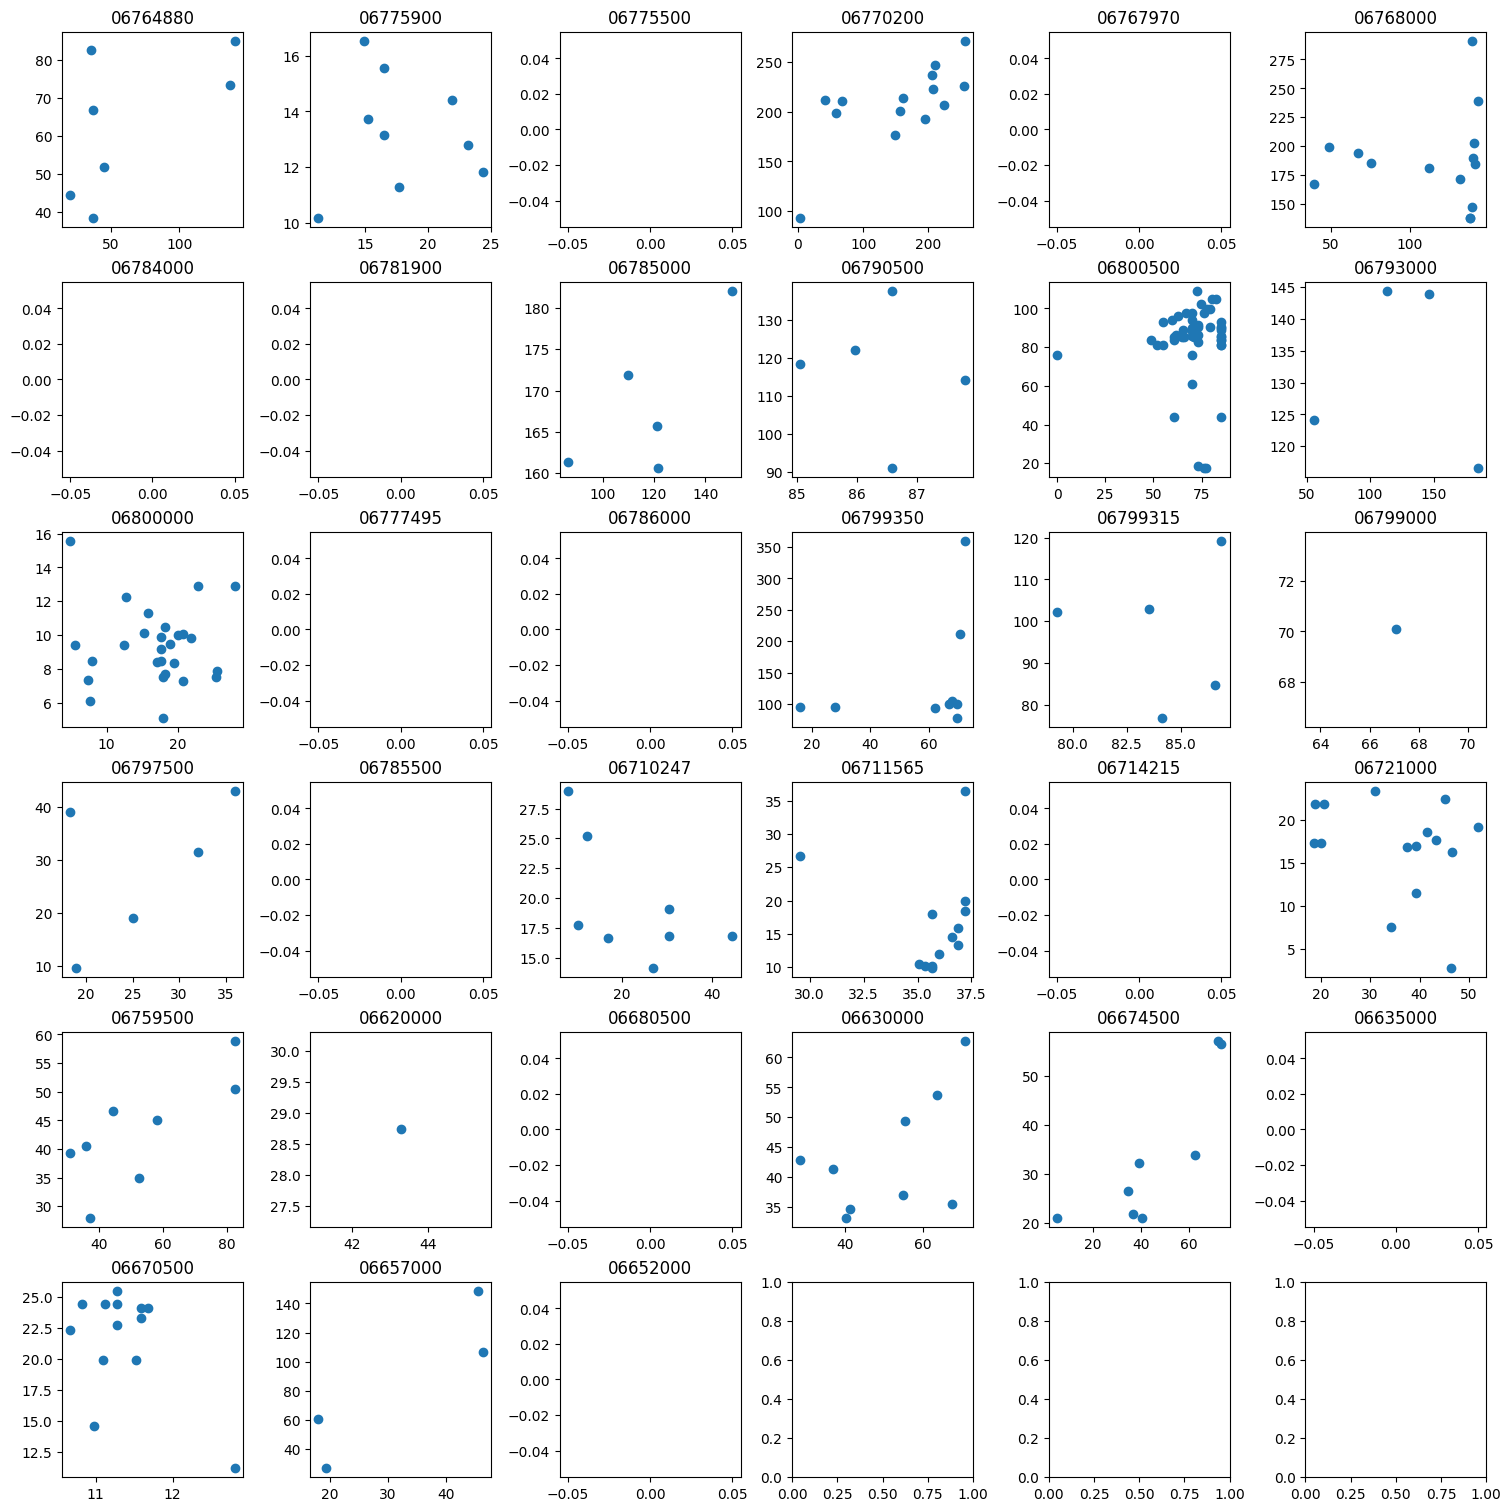

In [348]:
fig, axs = plt.subplots(6, 6, figsize=(15, 15), constrained_layout=True)

for g in range(len(gage_list)):
    tempdf = paired_Qw.loc[gage_list[g]]
    tempdf = tempdf.loc[(tempdf.chan_width >= 0) & (tempdf.overall_mean_width >= 0)]
    ax = axs.flatten()[g]

    ax.scatter(tempdf.chan_width, tempdf.overall_mean_width)
    # ax.scatter(tempdf.Q_cms, tempdf.chan_width)
    # ax.plot(tempdf.index, tempdf.overall_mean_width)
    # ax.plot(tempdf.index, tempdf.median_width)
    # ax.plot(tempdf.index, tempdf.midrange_mean)
    # ax.plot(tempdf.index, tempdf.predicted_width, c='tab:purple')
    ax.set_title(gage_list[g])
    # ax.plot(tempdf.index, tempdf.w10, c='tab:purple')
    # ax.plot(tempdf.index, tempdf.w90, c='tab:purple')

In [22]:
Q_isw = pd.merge(Q, all_isw, how='outer', on=['site_no', 'date'])
Q_isw

,site_no,date,Q_cms,Q_percentile,Q_percentile_bin,chan_width
0,06620000,2018-01-17,NaN,NaN,NaN,35.670732
1,06620000,2018-03-13,NaN,NaN,NaN,51.524390
2,06620000,2018-03-24,9.323401,0.591856,5.0,NaN
3,06620000,2018-03-25,12.128923,0.648990,6.0,NaN
4,06620000,2018-03-26,12.355632,0.655303,6.0,NaN
...,...,...,...,...,...,...
68123,06800500,2024-12-28,32.306010,0.312968,3.0,NaN
68124,06800500,2024-12-29,33.439554,0.327681,3.0,NaN
68125,06800500,2024-12-30,35.990028,0.363092,3.0,NaN
68126,06800500,2024-12-31,36.556801,0.369825,3.0,NaN


C:\Users\dego\AppData\Local\Temp\ipykernel_103676\3953499633.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dego\AppData\Local\Temp\ipykernel_103676\3953499633.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\dego\AppData\Local\Temp\ipykernel_103676\3953499633.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

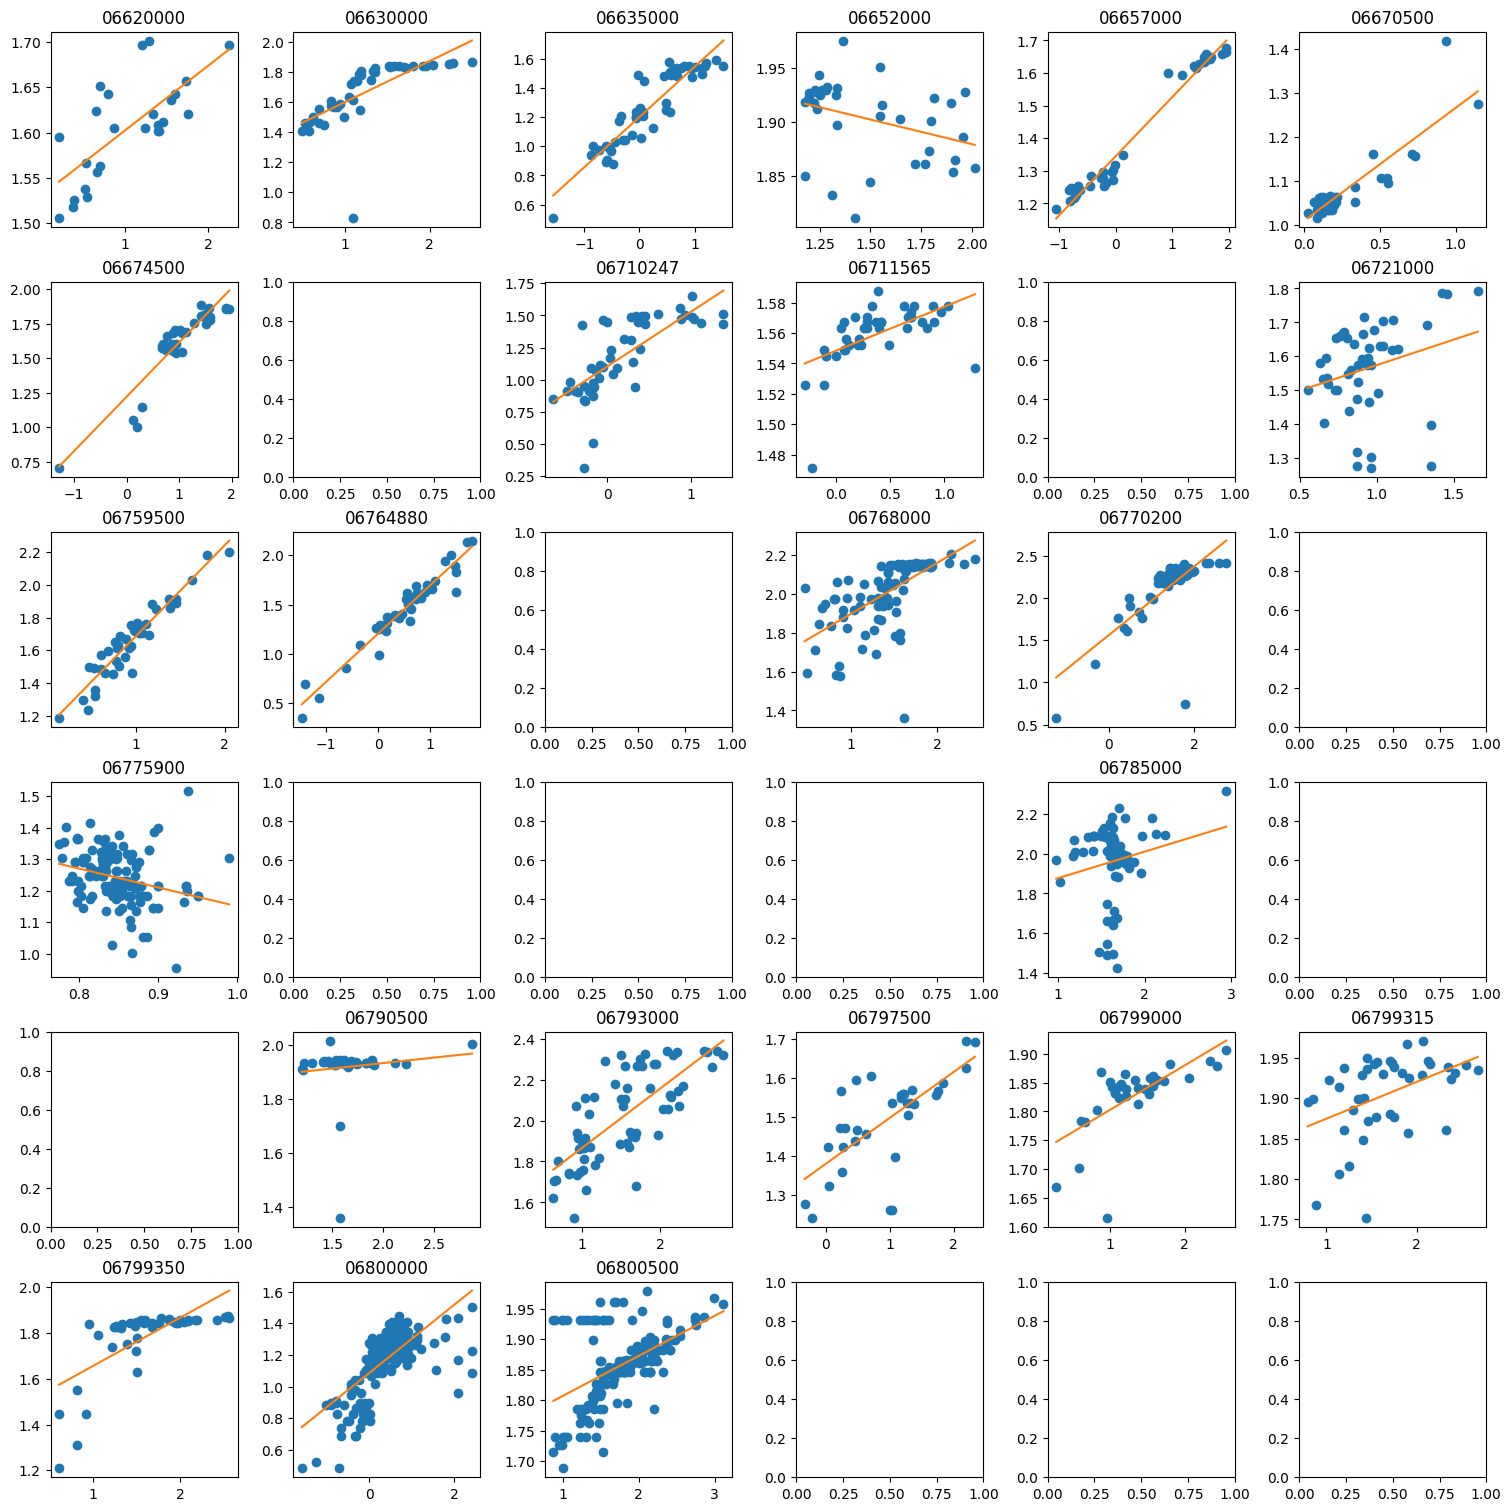

In [349]:
rc_slopes = []
rc_intercepts = []
r2s = []
site_nos = []
n_meas = []
fig, axs = plt.subplots(6, 6, figsize=(15, 15), constrained_layout=True)

p = 0


for sn, df in paired_Qw.groupby('site_no'):

    df = df.loc[(df.Q_cms > 0) & (df.chan_width > 0)]

    
    
    if len(df) > 5:

        df['logQ'] = np.log10(df.Q_cms)
        df['log_isw'] = np.log10(df.chan_width)

        slope, intercept, r, pval, _ = linregress(df.logQ, df.log_isw)

        ax = axs.flatten()[p]

        ax.scatter(df.logQ, df.log_isw, zorder=0)
        qaxis = np.linspace(min(df.logQ), max(df.logQ))
        ax.plot(qaxis, qaxis * slope + intercept, c='tab:orange', zorder=1)

        rc_slopes.append(slope)
        rc_intercepts.append(intercept)
        r2s.append(r ** 2)
        site_nos.append(sn)
        n_meas.append(len(df))

        ax.set_title(sn)

    else:
        rc_slopes.append(None)
        rc_intercepts.append(None)
        r2s.append(None)
        site_nos.append(sn)
        n_meas.append(len(df))
    p += 1

In [350]:
rating_curve_parms = pd.DataFrame({'site_no': site_nos, 'loga': rc_intercepts, 'b': rc_slopes, 'r2': r2s, 'n_meas': n_meas}).set_index('site_no')
rating_curve_parms['a'] = 10 ** rating_curve_parms.loga
rating_curve_parms

,loga,b,r2,n_meas,a
site_no,,,,,
06620000,1.530836,0.071459,0.505187,26,33.949712
06630000,1.327849,0.271679,0.468132,41,21.273984
06635000,1.201460,0.344146,0.838188,49,15.902304
06652000,1.970773,-0.045704,0.117457,35,93.491595
06657000,1.344484,0.181462,0.972364,35,22.104678
06670500,1.010392,0.255494,0.779363,47,10.242182
06674500,1.220528,0.394849,0.852579,38,16.616064
06680500,NaN,NaN,NaN,0,NaN
06710247,1.102370,0.426956,0.543195,48,12.658149


In [25]:
regional_b = (rating_curve_parms.loc[rating_curve_parms['r2'] > 0.5]['b'].mean())
regional_a = (rating_curve_parms.loc[rating_curve_parms['r2'] > 0.5]['a'].mean())


for row in rating_curve_parms.loc[rating_curve_parms.r2.isna()].iterrows():
    sn = row[0]
    rating_curve_parms.at[sn, 'a'] = regional_a
    rating_curve_parms.at[sn, 'b'] = regional_b

rating_curve_parms



# fig, axs = plt.subplots(6, 6, figsize=(15, 15), constrained_layout=True)
# p = 0
# res = {}
# for sn, df in paired_Qw.groupby('site_no'):
# # .loc[['06620000',
# #  '06630000',
# #  '06652000',
# #  '06657000',
# #  '06674500',
# #  '06711565',
# #  '06721000',
# #  '06759500',
# #  '06764880',
# #  '06785000',
# #  '06790500',
# #  '06799000',
# #  '06799315',
# #  '06799350']]

#     df = df.loc[(df.Q_cms >= 0)]

#     df['logQ'] = np.log10(df.Q_cms)
#     df['log_isw'] = np.log10(df.chan_width)
#     df['predicted_w'] = regional_a * (df['Q_cms'] ** regional_b)
#     df['log_predicted_w'] = np.log10(df['predicted_w'])

#     if len(df) > 5:
#         # slope, intercept, r, pval, _ = linregress(df.logQ, df.log_isw)

#         ax = axs.flatten()[p]

#         ax.scatter(df.logQ, df.log_isw)
#         ax.scatter(df.logQ, df.log_predicted_w)

#         # rc_slopes.append(slope)
#         # rc_intercepts.append(intercept)
#         # r2s.append(r ** 2)
#         # site_nos.append(sn)
#         # n_meas.append(len(df))

#         ax.set_title(sn)

#         mean_residual = (df.log_predicted_w - df.log_isw).mean()

#         res[sn] = mean_residual
#         print(f'{sn}: {mean_residual}')
#         # ax.text(mean_residual[0].round(2), 0.8, 0.1, transform=ax.transAxes)
#     p += 1


,loga,b,r2,n_meas,a
site_no,,,,,
06620000,1.530836,0.071459,0.505187,26,33.949712
06630000,1.327849,0.271679,0.468132,41,21.273984
06635000,1.201460,0.344146,0.838188,49,15.902304
06652000,1.970773,-0.045704,0.117457,35,93.491595
06657000,1.344484,0.181462,0.972364,35,22.104678
06670500,1.010392,0.255494,0.779363,47,10.242182
06674500,1.220528,0.394849,0.852579,38,16.616064
06680500,NaN,0.341850,NaN,0,21.506034
06710247,1.102370,0.426956,0.543195,48,12.658149


In [26]:
Q_isw

,site_no,date,Q_cms,Q_percentile,Q_percentile_bin,chan_width
0,06620000,2018-01-17,NaN,NaN,NaN,35.670732
1,06620000,2018-03-13,NaN,NaN,NaN,51.524390
2,06620000,2018-03-24,9.323401,0.591856,5.0,NaN
3,06620000,2018-03-25,12.128923,0.648990,6.0,NaN
4,06620000,2018-03-26,12.355632,0.655303,6.0,NaN
...,...,...,...,...,...,...
68123,06800500,2024-12-28,32.306010,0.312968,3.0,NaN
68124,06800500,2024-12-29,33.439554,0.327681,3.0,NaN
68125,06800500,2024-12-30,35.990028,0.363092,3.0,NaN
68126,06800500,2024-12-31,36.556801,0.369825,3.0,NaN


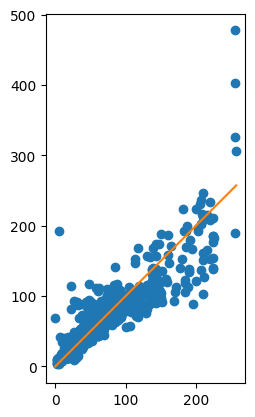

In [466]:
n = 31
g = gage_list[n]

df = Q_isw
fig, ax = plt.subplots()

# ax.set_title(f'{g}, {rating_curve_parms.loc[g, 'n_meas']}')
ax.set_aspect('equal')

# ax.scatter(df.Q_cms, df.predicted_width)

ax.scatter(df.chan_width, df.predicted_width)
ax.plot(np.linspace(0, df.chan_width.max(skipna=True)), np.linspace(0, df.chan_width.max(skipna=True)), c='tab:orange')


In [465]:
df = Q_isw.loc[(Q_isw.chan_width >= 0) & (Q_isw.predicted_width >= 0)]
linregress(df.chan_width, df.predicted_width)

LinregressResult(slope=np.float64(0.8797968559668127), intercept=np.float64(5.429464755548757), rvalue=np.float64(0.9213431900744888), pvalue=np.float64(0.0), stderr=np.float64(0.009594463884063494), intercept_stderr=np.float64(0.704511898617074))

In [393]:
# paired_Qw['predicted_width'] = rating_curve_parms.loc[x.index.get_level_values(0), 'b'] * 
# paired_Qw = paired_Qw.reset_index()
paired_Qw['predicted_width'] = paired_Qw.apply(lambda x: rating_curve_parms.loc[x.site_no, 'a'] * (x.Q_cms ** (rating_curve_parms.loc[x.site_no, 'b'])), axis=1)
paired_Qw

,site_no,date,overall_mean_width,median_width,sd_width,w05,w10,w20,w30,w40,...,w90,w95,max_width,min_width,n_meas,chan_width,Q_cms,Q_percentile,Q_percentile_bin,predicted_width
0,06620000,2018-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.670732,NaN,NaN,NaN,NaN
1,06620000,2018-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,51.524390,NaN,NaN,NaN,NaN
2,06620000,2018-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.323401,0.591483,5.0,39.821839
3,06620000,2018-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.128923,0.648580,6.0,40.577510
4,06620000,2018-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.355632,0.654890,6.0,40.631244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69352,06800500,2024-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,32.306010,0.314237,3.0,69.257266
69353,06800500,2024-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,33.439554,0.328864,3.0,69.414051
69354,06800500,2024-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.990028,0.364700,3.0,69.749402
69355,06800500,2024-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,36.556801,0.371282,3.0,69.820900


In [394]:
paired_Qw['Q_percentile'] = paired_Qw.groupby('site_no')['Q_cms'].rank(pct=True)
paired_Qw['Q_percentile_bin'] = paired_Qw.groupby('site_no')['Q_percentile'].transform(
    lambda x: pd.cut(x, bins=bins, labels=False)
)

paired_Qw

,site_no,date,overall_mean_width,median_width,sd_width,w05,w10,w20,w30,w40,...,w90,w95,max_width,min_width,n_meas,chan_width,Q_cms,Q_percentile,Q_percentile_bin,predicted_width
0,06620000,2018-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,35.670732,NaN,NaN,NaN,NaN
1,06620000,2018-03-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,51.524390,NaN,NaN,NaN,NaN
2,06620000,2018-03-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,9.323401,0.591483,5.0,39.821839
3,06620000,2018-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.128923,0.648580,6.0,40.577510
4,06620000,2018-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.355632,0.654890,6.0,40.631244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69352,06800500,2024-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,32.306010,0.314237,3.0,69.257266
69353,06800500,2024-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,33.439554,0.328864,3.0,69.414051
69354,06800500,2024-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,35.990028,0.364700,3.0,69.749402
69355,06800500,2024-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,36.556801,0.371282,3.0,69.820900


0
1
2
3
4
5
6
7
8
9


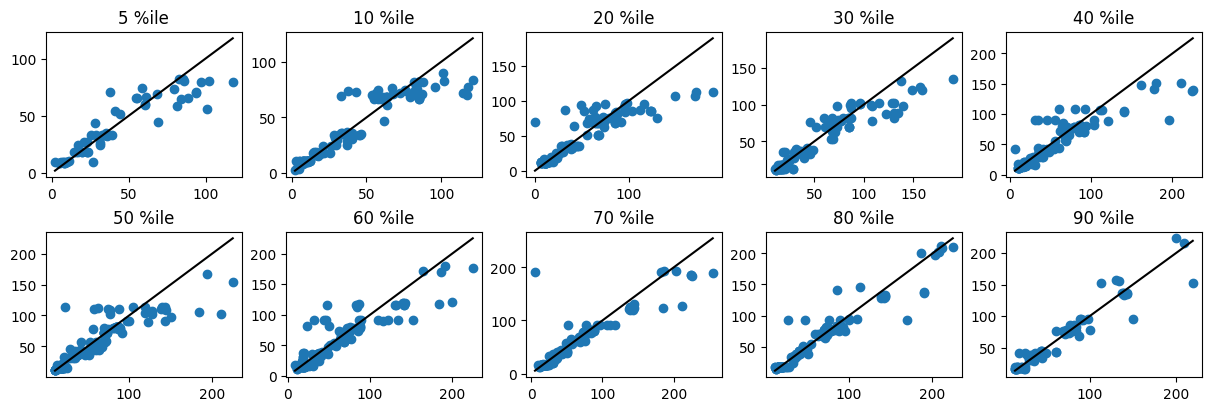

In [468]:
fig, axs = plt.subplots(2, 5, figsize=(12, 4), constrained_layout=True)
# nobridge_wQ = wQ.loc[wQ.index.get_level_values('site_no').isin(nobridge)]
# paired_Qw['color'] = paired_Qw.index.get_level_values('site_no').map(cs)
for i in range(len(bins) - 1):
    print(i)
    ax = axs.flatten()[i]
    df = Q_isw.loc[Q_isw.Q_percentile_bin == i].reset_index()
    # ax.scatter(df.predicted_width, df.w95)

    # ax.scatter(df.Q_cms, df.w50)
    ax.scatter(df.chan_width, df.predicted_width)
    ax.set_title(f'{int(100 * bins[i])} %ile')
    ax.plot(np.linspace(df.chan_width.min(skipna=True), df.chan_width.max(skipna=True)), np.linspace(df.chan_width.min(skipna=True), df.chan_width.max(skipna=True)), c='black')
    # ax.set_xscale('log')
    # ax.set_yscale('log')
    # ax.set_xlim(0, 1.1 * max(df.Q_cms))
    # ax.set_ylim(0, 1.1 * max(df.sat_width_m))


rmse = 18.060997629226257
bias = 1.4367503933849861


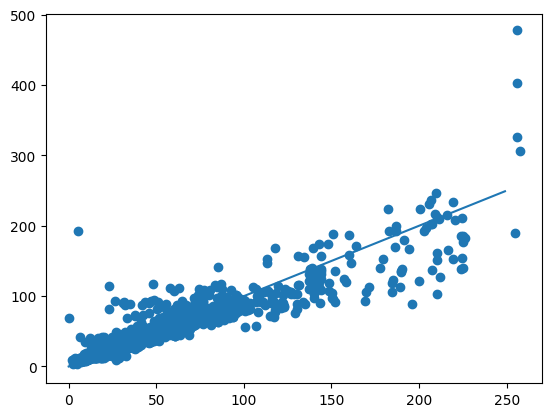

In [37]:
fig, ax = plt.subplots()
df = Q_isw.loc[(Q_isw.chan_width >= 0) & (Q_isw.predicted_width >= 0)]
ax.scatter(df.chan_width, df.predicted_width)
ax.plot(range(0, 250), range(0, 250))
print('rmse =', np.sqrt(mean_squared_error(df.chan_width, df.predicted_width)))
print('bias =', (df.chan_width - df.predicted_width).mean())

In [6]:
ews = []

files = glob.glob('C:/Users/dego/Documents/local_files/RSSA/effwidth_exports/all_sites/*20250928.csv')

for f in files:
    ews.append(pd.read_csv(f))

files = glob.glob('C:/Users/dego/Documents/local_files/RSSA/effwidth_exports/gage_sites/*g*_2025092*.csv')

for f in files:
    ews.append(pd.read_csv(f))

ew_df = pd.concat(ews)
ew_df['date'] = ew_df.apply(lambda x: datetime.date(int(x.img_id[10:14]), int(x.img_id[14:16]), int(x.img_id[16:18])), axis=1)

In [7]:
ew_pts1 = gpd.read_file(r"C:\Users\dego\Documents\local_files\RSSA\Platte_centerlines_masks\platte_pts_10000m.shp")[['iindex', 'geometry']]
ew_circles1 = gpd.read_file(r"C:\Users\dego\Documents\local_files\RSSA\Platte_centerlines_masks\buffs_3x_width_20250903.shp")[['iindex', 'geometry']]

ew_pts2 = gpd.read_file(r"C:\Users\dego\Documents\local_files\RSSA\Platte_centerlines_masks\gage_sites\gage_points_20250918.shp")[['iindex', 'geometry']]
ew_circles2 = gpd.read_file(r"C:\Users\dego\Documents\local_files\RSSA\Platte_centerlines_masks\gage_sites\gage_circles_3x_20250918.shp")[['iindex', 'geometry']]

ew_pts3 = gpd.read_file(r"C:\Users\dego\Documents\local_files\RSSA\Platte_centerlines_masks\gage_sites\gage_points_extra.shp")[['iindex', 'geometry']]
ew_circles3 = gpd.read_file(r"C:\Users\dego\Documents\local_files\RSSA\Platte_centerlines_masks\gage_sites\gage_circles_3x_extra.shp")[['iindex', 'geometry']]


ew_pts = pd.concat([ew_pts1, ew_pts2, ew_pts3]).to_crs(3857)
ew_circles = pd.concat([ew_circles1, ew_circles2, ew_circles3]).to_crs(3857)
ew_pts = ew_pts.loc[(ew_pts.iindex.isin(ew_circles.iindex)) & (ew_pts.iindex != 30618)]

cb_centerlines = gpd.read_file('C:/Users/dego/Documents/local_files/RSSA/Platte_centerlines_masks/vector_centerlines/s2_platte_centerlines.shp')\
    .set_crs(4326, allow_override=True)\
    .to_crs(3857)

ew_circles['riv_length'] = ew_circles.apply(lambda x: gpd.sjoin(cb_centerlines, gpd.GeoDataFrame(geometry=[x.geometry], crs=3857)).length.sum(), axis=1)

ew_pts = pd.merge(ew_pts, ew_circles[['iindex', 'riv_length']])
ew_pts = ew_pts.to_crs(3857).sjoin_nearest(merit_centerlines, distance_col='distance')

In [8]:
ew_gdf = pd.merge(ew_df, ew_pts, how='left', on='iindex').set_geometry('geometry')

In [9]:
ew_gdf['sat_width_m'] = ew_gdf.n_river * 100 / ew_gdf.riv_length
ew_gdf['fraction_cloud'] = ew_gdf.n_cloud / ew_gdf.n_pixels
ew_gdf['fraction_snow'] = ew_gdf.n_snow / ew_gdf.n_pixels
ew_gdf['fraction_edgeriver'] = ew_gdf.n_edgeriver / ew_gdf.n_edge

ew_gdf

,Unnamed: 0,img_id,iindex,n_pixels,n_valid,n_river,n_cloud,n_snow,n_cloudriver,n_edge,...,maxup,up1,up2,up3,up4,distance,sat_width_m,fraction_cloud,fraction_snow,fraction_edgeriver
0,0,S2A_13TDH_20181027_0_L2A,55200,73,73,13,8,0,2,30,...,2.0,74024633.0,74028351.0,0.0,0.0,118.340576,8.940086,0.109589,0.000000,0.100000
1,1,S2A_13TDH_20181027_0_L2A,120129,-999,-999,-999,-999,-999,-999,-999,...,2.0,74022697.0,74028538.0,0.0,0.0,86.523458,-283.791964,1.000000,1.000000,1.000000
2,2,S2A_13TDH_20181027_0_L2A,48581,758,758,145,16,0,15,90,...,2.0,74022688.0,74023317.0,0.0,0.0,4.369350,32.581987,0.021108,0.000000,0.122222
3,3,S2A_13TDH_20181027_0_L2A,120369,761,761,79,4,0,0,90,...,2.0,74022696.0,74028664.0,0.0,0.0,77.508158,16.804157,0.005256,0.000000,0.044444
4,4,S2A_13TDH_20181027_0_L2A,120622,759,759,109,18,0,0,90,...,2.0,74022696.0,74028664.0,0.0,0.0,82.037246,24.304556,0.023715,0.000000,0.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230933,447,S2A_14TPM_20241219_0_L2A,82494,1454,1454,326,0,28,0,124,...,2.0,74023344.0,74024364.0,0.0,0.0,22.942618,51.434918,0.000000,0.019257,0.153226
230934,448,S2A_14TQL_20241020_0_L2A,246043,763,763,196,0,0,0,90,...,2.0,74029705.0,74036481.0,0.0,0.0,19.119825,39.468678,0.000000,0.000000,0.133333
230935,449,S2A_14TPL_20240213_0_L2A,107328,3325,0,0,0,0,0,186,...,2.0,74029228.0,74029401.0,0.0,0.0,9.738052,0.000000,0.000000,0.000000,0.000000
230936,450,S2A_14TNL_20241105_0_L2A,259030,308,0,0,0,0,0,58,...,2.0,74029357.0,74035816.0,0.0,0.0,17.759166,0.000000,0.000000,0.000000,0.000000


In [12]:
gage_COMID

,site_no,COMID
0,06620000,74030717
1,06630000,74022829
2,06635000,74026624
3,06652000,74022670
4,06657000,74022653
5,06670500,74022745
6,06674500,74022645
7,06680500,74022523
8,06710247,74038444
9,06711565,74038438


In [13]:
gage_COMID_ew = pd.merge(gage_COMID, ew_gdf, how='left', on='COMID')
gage_COMID_ew

,site_no,COMID,Unnamed: 0,img_id,iindex,n_pixels,n_valid,n_river,n_cloud,n_snow,...,maxup,up1,up2,up3,up4,distance,sat_width_m,fraction_cloud,fraction_snow,fraction_edgeriver
0,06620000,74030717,0.0,S2A_13TCF_20180427_0_L2A,41900.0,163.0,163.0,46.0,12.0,0.0,...,2.0,74030731.0,74035470.0,0.0,0.0,124.753120,24.653621,0.073620,0.0,0.090909
1,06620000,74030717,17.0,S2A_13TCF_20180914_1_L2A,41900.0,163.0,163.0,43.0,25.0,0.0,...,2.0,74030731.0,74035470.0,0.0,0.0,124.753120,23.045776,0.153374,0.0,0.113636
2,06620000,74030717,44.0,S2B_13TCF_20180813_0_L2A,41900.0,163.0,0.0,0.0,0.0,0.0,...,2.0,74030731.0,74035470.0,0.0,0.0,124.753120,0.000000,0.000000,0.0,0.000000
3,06620000,74030717,56.0,S2A_13TCF_20180904_1_L2A,41900.0,163.0,163.0,44.0,22.0,0.0,...,2.0,74030731.0,74035470.0,0.0,0.0,124.753120,23.581724,0.134969,0.0,0.113636
4,06620000,74030717,105.0,S2A_13TCF_20180606_0_L2A,41900.0,163.0,163.0,57.0,0.0,0.0,...,2.0,74030731.0,74035470.0,0.0,0.0,124.753120,30.549052,0.000000,0.0,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37658,06800500,74029691,433.0,S2A_14TQL_20241219_0_L2A,246043.0,763.0,763.0,188.0,0.0,0.0,...,2.0,74029705.0,74036481.0,0.0,0.0,19.119825,37.857712,0.000000,0.0,0.133333
37659,06800500,74029691,441.0,S2B_15TTF_20241204_0_L2A,246043.0,760.0,760.0,188.0,0.0,0.0,...,2.0,74029705.0,74036481.0,0.0,0.0,19.119825,37.857712,0.000000,0.0,0.155556
37660,06800500,74029691,443.0,S2B_14TQL_20240309_0_L2A,246043.0,763.0,763.0,156.0,0.0,0.0,...,2.0,74029705.0,74036481.0,0.0,0.0,19.119825,31.413846,0.000000,0.0,0.100000
37661,06800500,74029691,448.0,S2A_14TQL_20241020_0_L2A,246043.0,763.0,763.0,196.0,0.0,0.0,...,2.0,74029705.0,74036481.0,0.0,0.0,19.119825,39.468678,0.000000,0.0,0.133333


In [14]:
for g in gage_list:
    df = gage_COMID_ew.loc[gage_COMID_ew.site_no == g]
    print(g, ': ', df.geometry.nunique())

06764880 :  1
06775900 :  3
06775500 :  3
06770200 :  4
06767970 :  1
06768000 :  1
06784000 :  4
06781900 :  4
06785000 :  3
06790500 :  1
06800500 :  2
06793000 :  3
06800000 :  5
06777495 :  2
06786000 :  1
06799350 :  2
06799315 :  2
06799000 :  1
06797500 :  2
06785500 :  3
06710247 :  1
06711565 :  2
06714215 :  2
06721000 :  2
06759500 :  0
06620000 :  1
06680500 :  5
06630000 :  2
06674500 :  6
06635000 :  0
06670500 :  1
06657000 :  3
06652000 :  1


In [227]:
gage_COMID_ew_filtered = gage_COMID_ew.copy()
print(len(gage_COMID_ew_filtered))
gage_COMID_ew_filtered = gage_COMID_ew_filtered.loc[gage_COMID_ew_filtered.fraction_cloud < 0.2]
# print(len(gage_COMID_ew_filtered))
gage_COMID_ew_filtered = gage_COMID_ew_filtered.loc[gage_COMID_ew_filtered.fraction_snow < 0.2]
# print(len(gage_COMID_ew_filtered))
gage_COMID_ew_filtered = gage_COMID_ew_filtered.loc[((gage_COMID_ew_filtered.n_cloud - gage_COMID_ew_filtered.n_cloudriver) / gage_COMID_ew_filtered.n_valid) < 0.2]
print(len(gage_COMID_ew_filtered))
gage_COMID_ew_filtered = gage_COMID_ew_filtered.loc[gage_COMID_ew_filtered.fraction_edgeriver < 0.2]
print(len(gage_COMID_ew_filtered))
gage_COMID_ew_filtered = gage_COMID_ew_filtered.loc[gage_COMID_ew_filtered.n_edge < gage_COMID_ew_filtered.n_river]
print(len(gage_COMID_ew_filtered))

37663
26668
24762
14231


In [228]:
gage_COMID_ew_stats = gage_COMID_ew_filtered.groupby(['site_no', 'date']).agg(
    mean_width = ('sat_width_m', lambda x: x.mean()),
    COMID = ('COMID', lambda x: int(x.mean()))
)
gage_COMID_ew_stats

mean_width     COMID
site_no  date                            
06620000 2018-04-27   24.653621  74030717
         2018-05-17   24.653621  74030717
         2018-06-06   30.549052  74030717
         2018-06-11   24.117673  74030717
         2018-06-21   24.653621  74030717
...                         ...       ...
06800500 2024-11-19   50.964136  74029691
         2024-12-04   46.431450  74029691
         2024-12-09   52.710831  74029691
         2024-12-19   47.587085  74029691
         2024-12-22   50.061326  74029691

[6035 rows x 2 columns]

In [229]:
Q_isw

,site_no,date,Q_cms,Q_percentile,Q_percentile_bin,chan_width,predicted_width
0,06620000,2018-01-17,NaN,NaN,NaN,35.670732,NaN
1,06620000,2018-03-13,NaN,NaN,NaN,51.524390,NaN
2,06620000,2018-03-24,9.323401,0.591856,5.0,NaN,39.821839
3,06620000,2018-03-25,12.128923,0.648990,6.0,NaN,40.577510
4,06620000,2018-03-26,12.355632,0.655303,6.0,NaN,40.631244
...,...,...,...,...,...,...,...
68123,06800500,2024-12-28,32.306010,0.312968,3.0,NaN,69.257266
68124,06800500,2024-12-29,33.439554,0.327681,3.0,NaN,69.414051
68125,06800500,2024-12-30,35.990028,0.363092,3.0,NaN,69.749402
68126,06800500,2024-12-31,36.556801,0.369825,3.0,NaN,69.820900


In [320]:
all_joined = pd.merge(gage_COMID_ew_stats, Q_isw, on=['site_no', 'date'], how='outer')
# all_joined = pd.merge(all_joined, Q.reset_index(), on=['site_no', 'date'], how='outer')
all_joined

,site_no,date,mean_width,COMID,Q_cms,Q_percentile,Q_percentile_bin,chan_width,predicted_width
0,06620000,2018-01-17,NaN,NaN,NaN,NaN,NaN,35.670732,NaN
1,06620000,2018-03-13,NaN,NaN,NaN,NaN,NaN,51.524390,NaN
2,06620000,2018-03-24,NaN,NaN,9.323401,0.591856,5.0,NaN,39.821839
3,06620000,2018-03-25,NaN,NaN,12.128923,0.648990,6.0,NaN,40.577510
4,06620000,2018-03-26,NaN,NaN,12.355632,0.655303,6.0,NaN,40.631244
...,...,...,...,...,...,...,...,...,...
69015,06800500,2024-12-28,NaN,NaN,32.306010,0.312968,3.0,NaN,69.257266
69016,06800500,2024-12-29,NaN,NaN,33.439554,0.327681,3.0,NaN,69.414051
69017,06800500,2024-12-30,NaN,NaN,35.990028,0.363092,3.0,NaN,69.749402
69018,06800500,2024-12-31,NaN,NaN,36.556801,0.369825,3.0,NaN,69.820900


Text(0.1, 0.8, 'r2 = 0.8467771368932614\nbias = -1.4367503933849861\nrmse = 18.060997629226257')

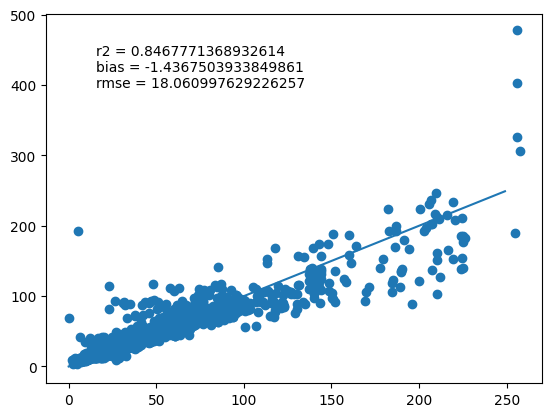

In [231]:
fig, ax = plt.subplots()
# ax.scatter(all_joined.predicted_width, all_joined.mean_width)
# ax.scatter(all_joined.predicted_width, all_joined.chan_width)
ax.scatter(all_joined.chan_width, all_joined.predicted_width)

df = all_joined.loc[(all_joined.chan_width >= 0) & (all_joined.predicted_width >= 0)]

r2 = r2_score(df.chan_width, df.predicted_width)
errors = df.predicted_width - df.chan_width
bias = np.mean(errors)
# print(bias)
mse = mean_squared_error(df.chan_width, df.predicted_width)
rmse = np.sqrt(mse)
# print(rmse)

ax.plot(range(0, 250), range(0, 250))
ax.text(0.1, 0.8, f'r2 = {r2}\nbias = {bias}\nrmse = {rmse}', transform=ax.transAxes)

In [232]:
from sklearn.metrics import r2_score



In [233]:
bins = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95]
all_joined['isw_percentile'] = all_joined.groupby('site_no')['chan_width'].rank(pct=True)
all_joined['isw_percentile_bin'] = all_joined.groupby('site_no')['isw_percentile'].transform(
    lambda x: pd.cut(x, bins=bins, labels=False)
)

all_joined['Q_percentile'] = all_joined.groupby('site_no')['Q_cms'].rank(pct=True)
all_joined['Q_percentile_bin'] = all_joined.groupby('site_no')['Q_percentile'].transform(
    lambda x: pd.cut(x, bins=bins, labels=False)
)
# all_joined

In [389]:
paired_Qw.predicted_width >= 0

site_no   date      
06620000  2018-01-17    False
          2018-03-13    False
          2018-03-24    False
          2018-03-25    False
          2018-03-26    False
                        ...  
06800500  2024-12-28    False
          2024-12-29    False
          2024-12-30    False
          2024-12-31    False
          2025-01-22    False
Name: predicted_width, Length: 69357, dtype: bool

0.05
279
0.1
556
0.2
552
0.3
515
0.4
488
0.5
473
0.6
463
0.7
519
0.8
533
0.9
228


Text(0.02, 0.5, 'S2 effective width (m)')

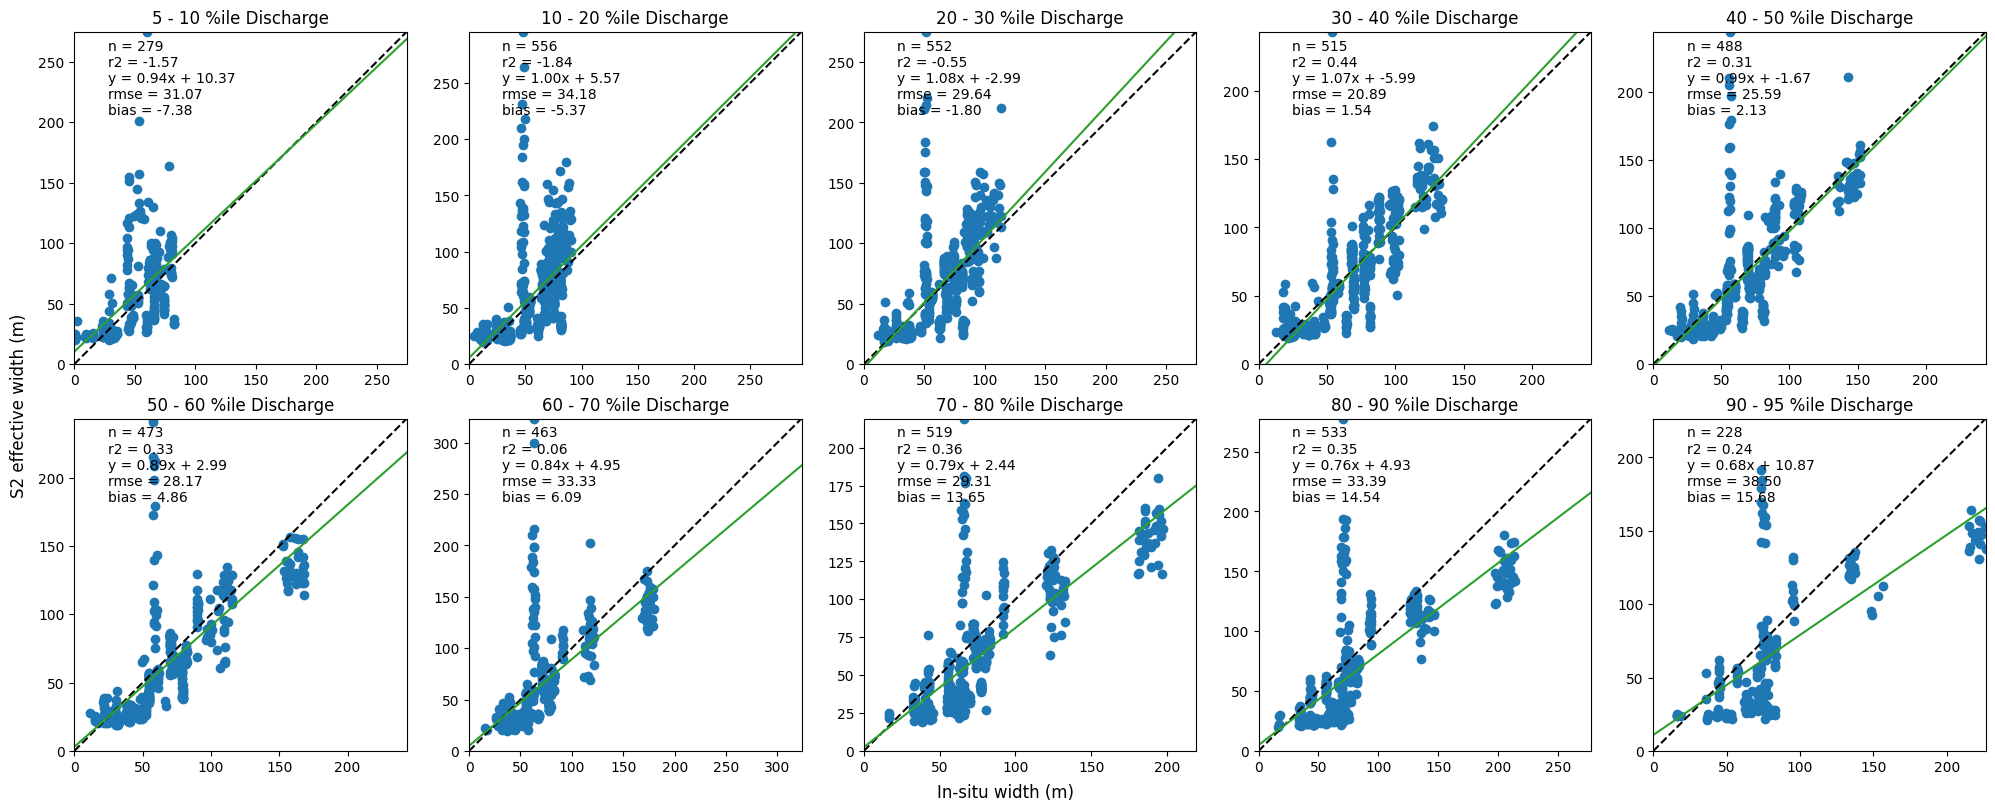

In [400]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8), constrained_layout=True)
# nobridge_wQ = wQ.loc[wQ.index.get_level_values('site_no').isin(nobridge)]
# paired_Qw['color'] = paired_Qw.index.get_level_values('site_no').map(cs)
biases = []
rmses = []
r2s = []
for i in range(len(bins) - 1):
    print(bins[i])
    # ax = axs[0, i]
    # df = all_joined.loc[all_joined.isw_percentile_bin == i].reset_index()
    # df = df.loc[(df.predicted_width >= 0) & (df.overall_overall_overall_overall_overall_overall_overall_overall_mean_width >= 0)]
    # slope, intercept, r, pval, _ = linregress(df.predicted_width, df.mean_width)

    # ax.scatter(df.predicted_width, df.mean_width)
    # waxis = np.linspace(0, df.predicted_width.max(skipna=True))
    # ax.plot(waxis, waxis, c='black', ls='--')
    # ax.plot(waxis, waxis * slope + intercept, c='tab:green')
    # ax.set_title(f'{int(100 * bins[i])} - {int(100 * bins[i + 1])} %ile width')

    # ax.text(0.1, 0.8, f'n = {len(df)}\nr = {r:.2f}\ny = {slope:.2f}x + {intercept:.2f}', transform=ax.transAxes)

    # ax = axs[1, i]
    ax = axs.flatten()[i]
    df = all_joined.loc[all_joined.Q_percentile_bin == i].reset_index()
    df = df.loc[(df.predicted_width >= 0) &
                (df.mean_width >= 0)]
    # &
    #             (df.site_no != '06799350') & # omit this gage for lakes beside river
    #             # (df.site_no != '06764880')] # dominated by bridge effects
    #             (df.site_no != '06770200') & 
    #             (df.site_no != gage_list[4])] 
    print(len(df))
    if len(df) > 2:
        upper = max(df.predicted_width.max(), df.mean_width.max())

        slope, intercept, r, pval, _ = linregress(df.predicted_width, df.mean_width)

        errors = df.predicted_width - df.mean_width
        bias = np.mean(errors)
        mse = mean_squared_error(df.predicted_width, df.mean_width)
        rmse = np.sqrt(mse)
        r2 = r2_score(df.predicted_width, df.mean_width)

        ax.scatter(df.predicted_width, df.mean_width)
        waxis = np.linspace(0, upper)
        ax.plot(waxis, waxis, c='black', ls='--')
        ax.plot(waxis, waxis * slope + intercept, c='tab:green')
        ax.set_title(f'{int(100 * bins[i])} - {int(100 * bins[i + 1])} %ile Discharge')

        ax.text(0.1, 0.75, f'n = {len(df)}\nr2 = {r2:.2f}\ny = {slope:.2f}x + {intercept:.2f}\nrmse = {rmse:.2f}\nbias = {bias:.2f}', transform=ax.transAxes)
        ax.set_aspect('equal')
        ax.set_xlim(0, upper)
        ax.set_ylim(0, upper)

        r2s.append(r2)
        biases.append(bias)
        rmses.append(rmse)

fig.supxlabel('In-situ width (m)')
fig.supylabel('S2 effective width (m)')

In [401]:
print('mean rmse =', np.array(rmses).mean())
print('mean bias =', np.array([abs(b) for b in biases]).mean())
print('mean r2 =', np.array(r2s).mean())

mean rmse = 30.40618420894315
mean bias = 7.3050841747890445
mean r2 = -0.18633134254903166


In [402]:
print('mean rmse 10-90% =', np.array(rmses[1:9]).mean())
print('mean bias 10-90% =', np.array([abs(b) for b in biases[1:9]]).mean())
print('mean r2 10-90% =', np.array(r2s[1:9]).mean())

mean rmse 10-90% = 29.311590665200995
mean bias 10-90% = 6.248822529543798
mean r2 10-90% = -0.0674940686131818


In [275]:
all_joined.loc[(all_joined.site_no == '06764880') & (all_joined.mean_width >= 0) & (all_joined.predicted_width >= 0)]

,site_no,date,mean_width,COMID,Q_cms,Q_percentile,Q_percentile_bin,chan_width,predicted_width,isw_percentile,isw_percentile_bin
26729,06764880,2018-03-17,22.828350,74029407.0,4.420822,0.600551,6.0,NaN,33.126237,NaN,NaN
26734,06764880,2018-03-22,22.176111,74029407.0,3.287278,0.464417,4.0,NaN,28.671503,NaN,NaN
26739,06764880,2018-03-27,23.698001,74029407.0,2.683666,0.396235,3.0,NaN,25.971683,NaN,NaN
26868,06764880,2018-08-02,27.394020,74029407.0,6.432863,0.748393,7.0,NaN,39.772442,NaN,NaN
26870,06764880,2018-08-04,25.219891,74029407.0,5.922768,0.719697,7.0,NaN,38.202509,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
28775,06764880,2024-08-27,27.611432,74029407.0,1.969533,0.324839,3.0,NaN,22.335750,NaN,NaN
28780,06764880,2024-09-01,28.481084,74029407.0,1.414096,0.258953,2.0,NaN,19.004686,NaN,NaN
28793,06764880,2024-09-14,35.655708,74029407.0,0.015303,0.094123,0.0,NaN,2.092327,NaN,NaN
28818,06764880,2024-10-09,30.437800,74029407.0,1.867514,0.314968,3.0,NaN,21.764074,NaN,NaN


In [105]:
from plotly import graph_objects as go

In [282]:
gage_COMID.loc[gage_COMID.site_no == '06770200']

,site_no,COMID
16,06770200,74029153


In [283]:
gage_COMID_ew.loc[gage_COMID_ew.COMID == 74029153].iindex.unique()

array([221443., 222016., 227221., 217337.])

In [268]:
ew_pts2.loc[ew_pts2.iindex == 225467]

,iindex,geometry
15,225467,POINT (-101.57714 41.12573)


In [284]:
tdf = all_joined.loc[(all_joined.mean_width >= 0) & 
                     (all_joined.predicted_width >= 0) & 
                     (all_joined.site_no != '06799350') & 
                     (all_joined.site_no != '06770200') &
                     (all_joined.site_no != gage_list[0]) & 
                     (all_joined.Q_percentile_bin == 1)]
tdf


,site_no,date,mean_width,COMID,Q_cms,Q_percentile,Q_percentile_bin,chan_width,predicted_width,isw_percentile,isw_percentile_bin
1533,06620000,2024-09-02,24.117673,74030717.0,2.318098,0.173186,1.0,NaN,36.051903,NaN,NaN
1752,06630000,2018-08-08,25.972071,74022829.0,6.574556,0.148723,1.0,NaN,35.485065,NaN,NaN
1754,06630000,2018-08-10,25.023729,74022829.0,5.384335,0.104015,1.0,NaN,33.611023,NaN,NaN
1769,06630000,2018-08-25,26.902179,74022829.0,6.999635,0.172141,1.0,NaN,36.094223,NaN,NaN
1772,06630000,2018-08-28,25.375811,74022829.0,5.384335,0.104015,1.0,NaN,33.611023,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
68959,06800500,2024-10-20,44.961084,74029691.0,17.541597,0.112628,1.0,NaN,66.538854,NaN,NaN
68961,06800500,2024-10-23,43.421719,74029691.0,19.015204,0.128474,1.0,NaN,66.891717,NaN,NaN
68970,06800500,2024-11-07,42.812759,74029691.0,24.541232,0.185763,1.0,NaN,68.020085,NaN,NaN
68991,06800500,2024-12-04,46.431450,74029691.0,22.444175,0.164554,1.0,NaN,67.622861,NaN,NaN


In [285]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=tdf.predicted_width,
        y=tdf.mean_width, 
        mode='markers', 
        hoverinfo='text', 
        hovertemplate=tdf.site_no,
        marker=dict(
            color=df.Q_percentile_bin
        )
    )
)
fig.update_layout(
    yaxis_scaleanchor="x",
    yaxis_scaleratio=1,
    width=600,
    height=600,
    xaxis=dict(range=[0, max(tdf.predicted_width.max(), tdf.chan_width.max())]),
    yaxis=dict(range=[0, max(tdf.predicted_width.max(), tdf.chan_width.max())])
)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'text',
              'hovertemplate': array(['06620000', '06630000', '06630000', ..., '06800500', '06800500',
                                      '06800500'], shape=(462,), dtype=object),
              'marker': {'color': {'bdata': ('AAAAAAAAIkAAAAAAAAAiQAAAAAAAAC' ... 'AAACJAAAAAAAAAIkAAAAAAAAAiQA=='),
                                   'dtype': 'f8'}},
              'mode': 'markers',
              'type': 'scatter',
              'x': {'bdata': ('ZsJuw6QGQkADHwWeFr5BQH/2yAM2zk' ... 'gPEkkBUUD+PeD03OdQQFMLG74+7lBA'),
                    'dtype': 'f8'},
              'y': {'bdata': ('9n2Cyh8eOEDolkCq2fg5QLVEJx4TBj' ... 'YkeghoRUAE+Oy/OTdHQJt2CITZB0lA'),
                    'dtype': 'f8'}}],
    'layout': {'height': 600,
               'template': '...',
               'width': 600,
               'xaxis': {'range': [0, 121.03658536585367]},
               'yaxis': {'range': [0, 121.03658536585367], 'scaleanchor': 'x', 'scaleratio': 1}}
})

<Axes: >

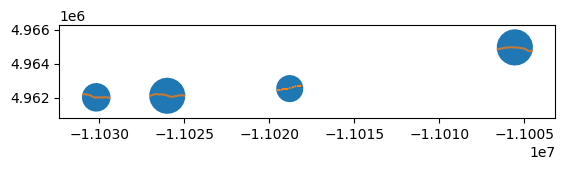

In [264]:
c = ew_circles.loc[(ew_circles.iindex.isin([222016, 221443, 227221, 217337]))]
cls = gpd.sjoin(cb_centerlines, c)

fig, ax = plt.subplots()
c.plot(ax=ax)
cls.plot(ax=ax, color='tab:orange')